# Classification Examples

In [1]:
# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from slickml.classification import XGBoostCVClassifier

# XGBoostCVClassifier

## Example 1

In [3]:
# loading data
df = pd.read_csv("../data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [4]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [8]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("auc"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 183 -*- 4-Folds CV AUC: Train = 0.948 +/- 0.003 -*- Test = 0.871 +/- 0.02 *-*


In [11]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.6877867 , 0.65373343, 0.98943466, 0.9162364 , 0.79401   ,
       0.7994595 , 0.6686053 , 0.92332643, 0.9750308 , 0.99557424],
      dtype=float32)

In [12]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.697112,0.010108,0.659285,0.049091
1,0.725564,0.020599,0.689685,0.045087
2,0.741235,0.024471,0.716515,0.041282
3,0.754972,0.033841,0.730396,0.042850
4,0.774784,0.028585,0.741953,0.050053


In [13]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1142.392678
1,F6,614.611552
2,F5,564.931927
3,F2,474.022514
4,F3,84.194291
5,F4,79.203023


In [ ]:
clf.

###  TODO

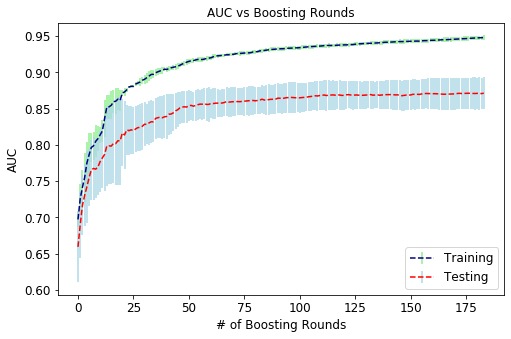

In [14]:
import matplotlib.pyplot as plt
cv_results = clf.cv_results_

plt.figure(figsize=(8,5))
plt.errorbar(range(cv_results.shape[0]), cv_results.iloc[:,0],
            yerr = cv_results.iloc[:,1], fmt = "--", ecolor="lightgreen", c = "navy", label = "Training")

plt.errorbar(range(cv_results.shape[0]), cv_results.iloc[:,2],
            yerr = cv_results.iloc[:,3], fmt = "--", ecolor="lightblue", c = "red", label = "Testing")


plt.xlabel("# of Boosting Rounds" ,  fontsize=12)
plt.ylabel(F"""{(cv_results.columns.tolist()[0].split("-")[1]).upper()}""", fontsize=12)
plt.title(F"""{(cv_results.columns.tolist()[0].split("-")[1]).upper()} vs Boosting Rounds""" , fontsize=12) 
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

In [74]:
import shap

In [189]:
clf.get_feature_importance()

,feature,total_gain
0,F1,1161.246964
1,F6,629.780284
2,F5,574.902815
3,F2,487.147613
4,F4,92.935422
5,F3,87.503146


In [190]:
clf.get_xgb_params()

{'eval_metric': 'auc',
 'tree_method': 'hist',
 'objective': 'binary:logistic',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'silent': True,
 'nthread': 4,
 'scale_pos_weight': 1,
 'validate_parameters': 1}

In [191]:
clf.n_splits

4

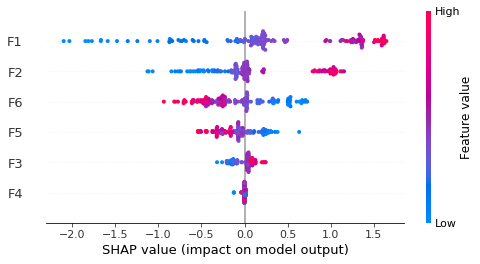

In [197]:
exp = shap.TreeExplainer(bst)
exp_vals = exp.shap_values(X_test)
shap.summary_plot(exp_vals, X_test)